In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection  import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.linear_model import ElasticNet
vehicle = pd.read_csv('vehicle_4_mean.csv')
vehicle.head()

,Vehicle,Type,Compactness,Circularity,Distance Circularity,Radius Ratio,Axis Asppect Ratio,Max Length Aspect Ratio,Scatter Ratio,Elongatedness,Axis Rectangularity,Max Length rectangularity,Scaled Variance along major axis,Scaled variance along minor axis,Scaled radius of gyration,Skewness about major axis,Skewness about minor axis,Kurtosis about minor axis,Kurtosis about major axis,Hollows Ratio
0,van,1,93.506057,48.000000,83.0,178.0,72.0,10.0,168.69852,42.000000,20.000000,159.0,176.0,379.000000,174.903096,70.0,6.410498,16.0,187.000000,197.000000
1,van,1,91.000000,41.000000,84.0,141.0,57.0,9.0,149.00000,45.000000,19.000000,143.0,170.0,441.831763,158.000000,72.0,9.000000,14.0,189.000000,195.539704
2,saab,2,104.000000,44.799462,106.0,209.0,66.0,10.0,207.00000,32.000000,23.000000,158.0,223.0,635.000000,220.000000,73.0,6.410498,9.0,188.000000,196.000000
3,van,1,93.000000,41.000000,82.0,159.0,63.0,9.0,144.00000,40.916555,20.605653,143.0,160.0,309.000000,127.000000,63.0,6.000000,10.0,188.890983,207.000000
4,bus,3,85.000000,44.000000,70.0,205.0,103.0,52.0,149.00000,45.000000,19.000000,144.0,241.0,325.000000,188.000000,127.0,9.000000,11.0,188.890983,183.000000


In [3]:
print(vehicle.shape)

(826, 20)


In [4]:
print(vehicle['Vehicle'].unique())

['van' 'saab' 'bus' 'opel']


In [5]:
print(vehicle.groupby('Vehicle').size())

Vehicle
bus     214
opel    209
saab    209
van     194
dtype: int64


In [6]:
cor = vehicle.corr()
print("Correlation matrix:")
print(cor)

Correlation matrix:
                                      Type  Compactness  Circularity  \
Type                              1.000000     0.096423     0.220121   
Compactness                       0.096423     1.000000     0.572500   
Circularity                       0.220121     0.572500     1.000000   
Distance Circularity              0.241156     0.668817     0.718488   
Radius Ratio                      0.275793     0.565401     0.553895   
Axis Asppect Ratio                0.011016     0.075990     0.130475   
Max Length Aspect Ratio          -0.103136     0.088341     0.192390   
Scatter Ratio                     0.350941     0.682585     0.770187   
Elongatedness                    -0.388179    -0.647731    -0.745439   
Axis Rectangularity               0.319952     0.684103     0.764292   
Max Length rectangularity         0.118125     0.556039     0.856253   
Scaled Variance along major axis  0.308827     0.641358     0.720766   
Scaled variance along minor axis  0.350060  

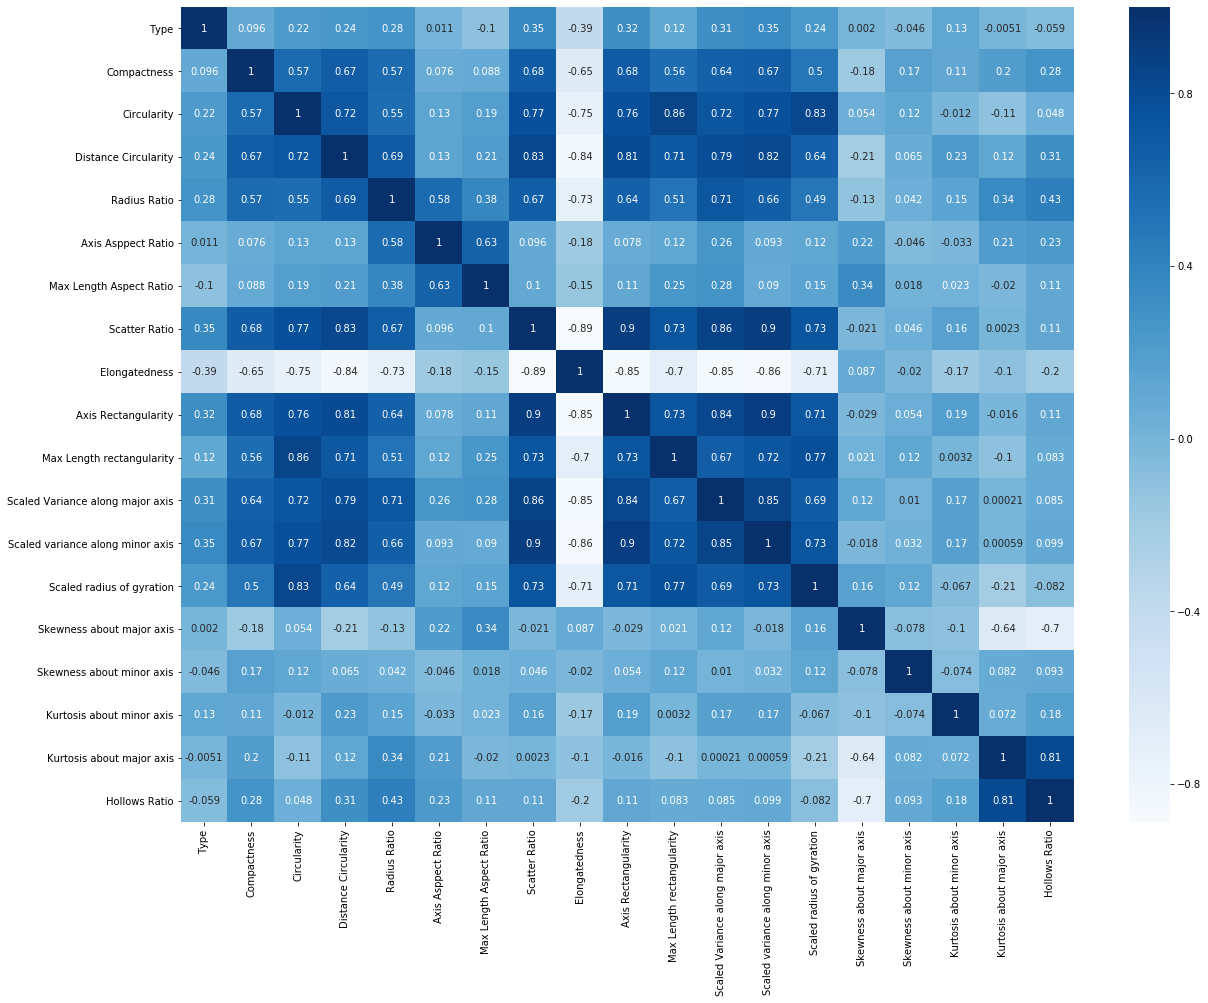

In [7]:
plt.figure(figsize=(20,15))
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()

In [8]:
feature_names = ['Compactness', 'Circularity', 'Distance Circularity', 'Radius Ratio','Axis Asppect Ratio','Max Length Aspect Ratio','Scatter Ratio','Elongatedness','Axis Rectangularity','Max Length rectangularity','Scaled Variance along major axis','Scaled variance along minor axis','Scaled radius of gyration','Skewness about major axis','Skewness about minor axis','Kurtosis about minor axis','Kurtosis about major axis','Hollows Ratio']
X = vehicle[feature_names]
#X=vehicle[['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r']]
y = vehicle['Type']

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])
print(principalDf)

            pc1        pc2
0    -59.876011  20.332547
1    -12.097328 -36.710853
2    209.058385  19.380597
3   -142.709664   2.882426
4   -102.249329  77.126654
5    534.388144 -55.503822
6    -82.372875  14.991671
7   -168.518704   6.110598
8   -235.052816  14.100873
9     62.702471  -6.258509
10  -188.893207  -6.553550
11  -236.113935 -11.391708
12   -90.863661  18.364334
13  -102.548175  -9.653480
14    10.074740  37.312329
15   201.265952  18.315803
16  -258.793882 -38.829119
17    41.928467  12.882378
18   257.028794 -10.313236
19   226.542507  22.700263
20   -89.852938  -2.101805
21  -232.566482 -13.227162
22  -100.189999  16.224748
23  -141.615869   0.933638
24   198.729072  30.847262
25    -9.049703 -23.271264
26  -222.915188 -33.582110
27   263.721744 -26.367957
28   132.171971   4.163946
29  -138.886007 -26.627280
..          ...        ...
796  -65.782442   1.833183
797  278.477396   1.045836
798   99.172860  21.394920
799   69.531319   9.838830
800 -179.019460 -25.939681
8

In [10]:
PCAdata = pd.concat([principalDf, vehicle[['Vehicle','Type']]], axis = 1)
PCAdata.head()

,pc1,pc2,Vehicle,Type
0,-59.876011,20.332547,van,1
1,-12.097328,-36.710853,van,1
2,209.058385,19.380597,saab,2
3,-142.709664,2.882426,van,1
4,-102.249329,77.126654,bus,3


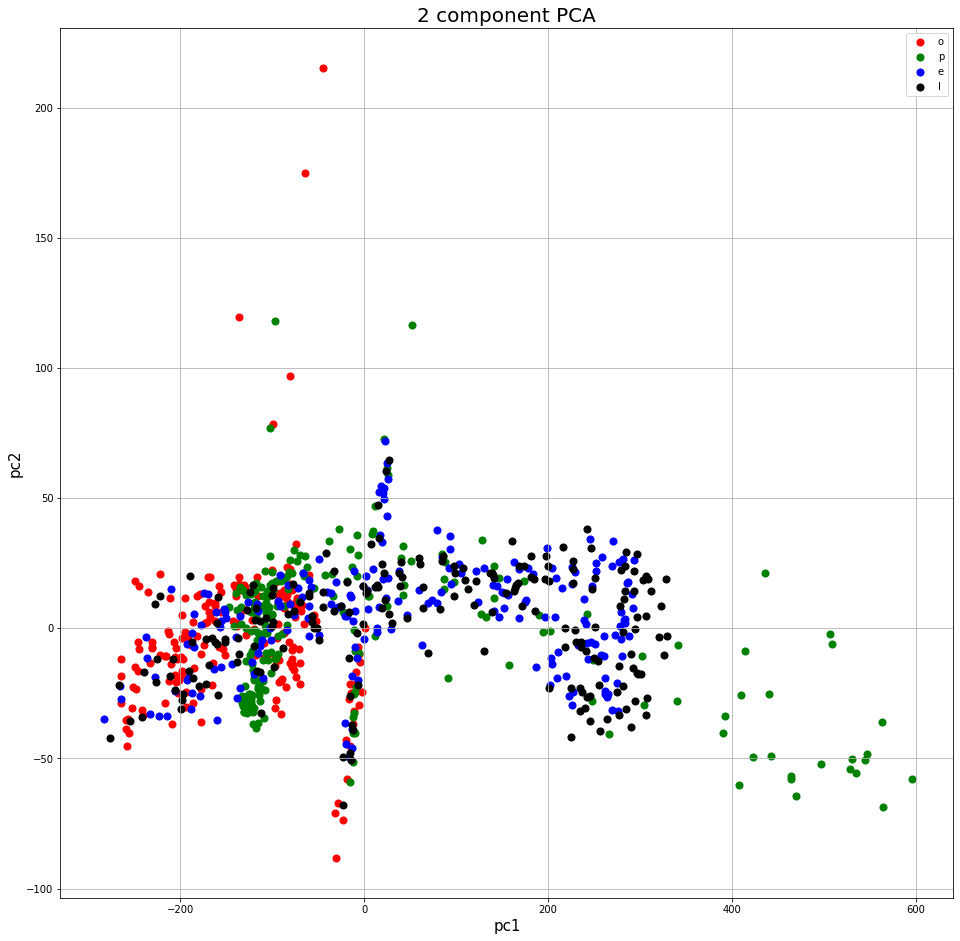

In [11]:
fig = plt.figure(figsize = (16,16))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('pc1', fontsize = 15)
ax.set_ylabel('pc2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
Types = ['van', 'bus', 'saab','opel']
colors = ['r', 'g', 'b','k']
for Type, color in zip(Types,colors):
    indicesToKeep = PCAdata['Vehicle'] == Type
    ax.scatter(PCAdata.loc[indicesToKeep, 'pc1'],PCAdata.loc[indicesToKeep, 'pc2'], c = color, s = 50)
ax.legend(Type)
ax.grid()

In [12]:
feature_names =['pc1','pc2']
X = PCAdata[feature_names]
y = PCAdata['Type']

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


C:\Users\Om\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Om\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy of Logistic regression classifier on training set: 0.36
Accuracy of Logistic regression classifier on test set: 0.36
              precision    recall  f1-score   support

           1       0.43      0.94      0.59        32
           2       0.32      0.23      0.27        52
           3       0.21      0.20      0.21        35
           4       0.42      0.23      0.30        47

    accuracy                           0.36       166
   macro avg       0.35      0.40      0.34       166
weighted avg       0.35      0.36      0.33       166

[[30  0  2  0]
 [16 12 17  7]
 [15  5  7  8]
 [ 9 20  7 11]]


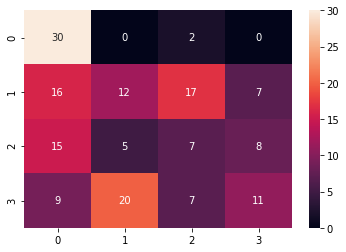

In [13]:
#LR
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = logreg.predict(X_test)
print(classification_report(y_test, pred))
cm = confusion_matrix(y_test, pred)
print(cm)
# visualize the confusion matrix in a heat map
df_cm = pd.DataFrame(cm)
heatmap= sns.heatmap(df_cm, annot= True,fmt="d")

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

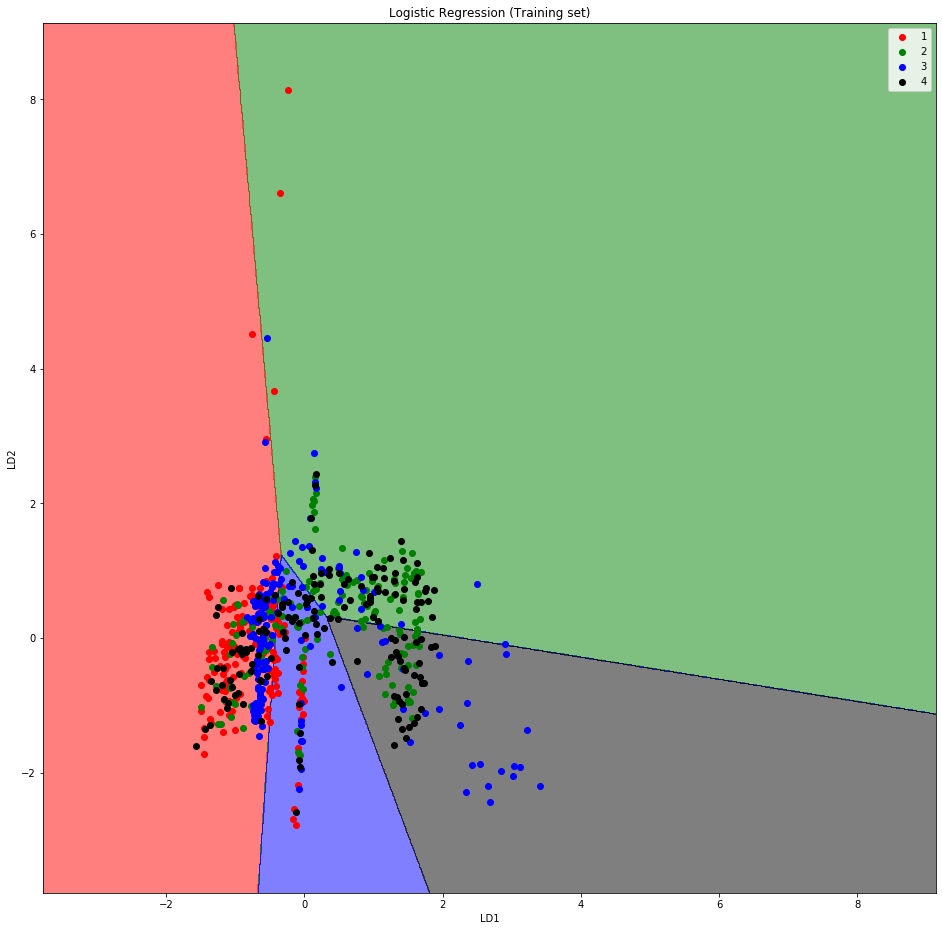

In [14]:
#LR
from matplotlib.colors import ListedColormap
import numpy as np
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, ].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.figure(figsize=(16,16))
plt.contourf(X1, X2, logreg.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.5, cmap = ListedColormap(('red', 'green', 'blue','black')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue','black'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()

Accuracy of LDA classifier on training set: 0.35
Accuracy of LDA classifier on test set: 0.36
              precision    recall  f1-score   support

           1       0.43      0.84      0.57        32
           2       0.34      0.23      0.28        52
           3       0.21      0.26      0.23        35
           4       0.42      0.23      0.30        47

    accuracy                           0.36       166
   macro avg       0.35      0.39      0.34       166
weighted avg       0.35      0.36      0.33       166

[[27  0  5  0]
 [15 12 18  7]
 [14  4  9  8]
 [ 7 19 10 11]]


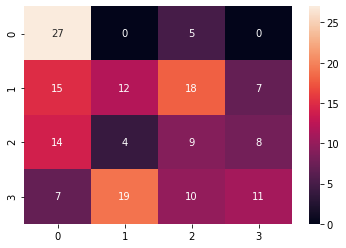

In [15]:
#LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = lda.predict(X_test)
print(classification_report(y_test, pred))
cm = confusion_matrix(y_test, pred)
print(cm)
# visualize the confusion matrix in a heat map
df_cm = pd.DataFrame(cm)
heatmap= sns.heatmap(df_cm, annot= True,fmt="d")

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

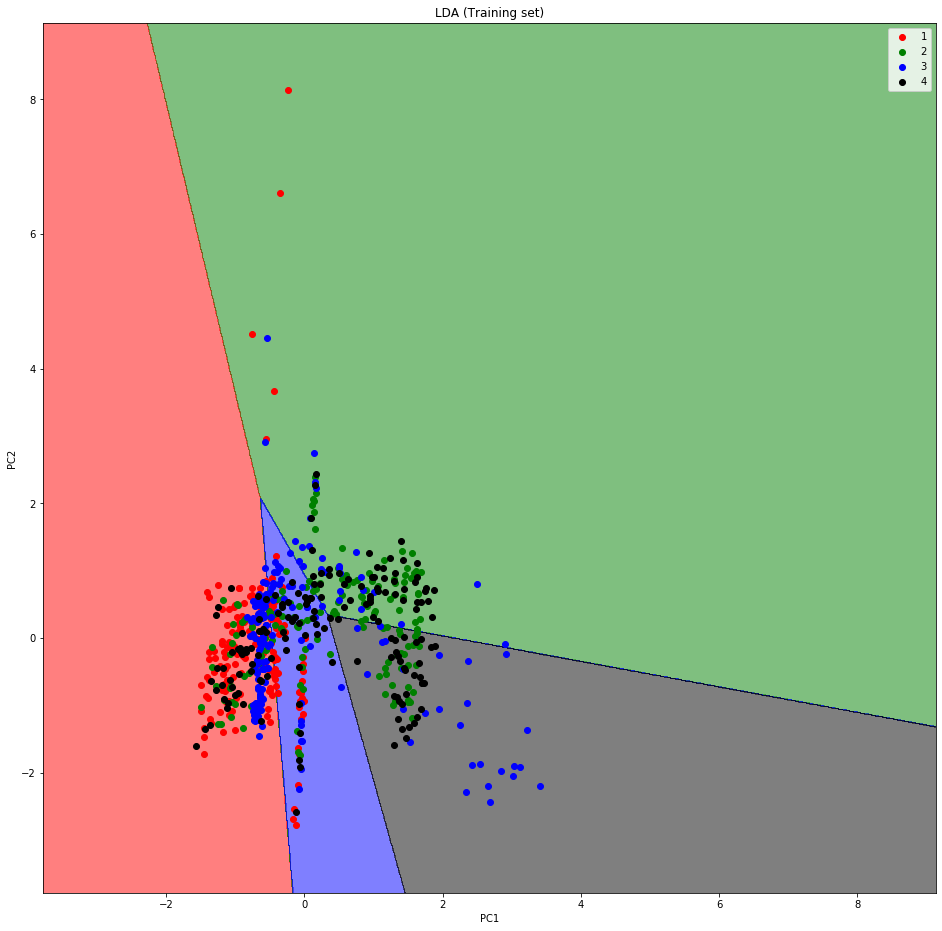

In [16]:
#LDA
from matplotlib.colors import ListedColormap
import numpy as np
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, ].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.figure(figsize=(16,16))
plt.contourf(X1, X2, lda.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.5, cmap = ListedColormap(('red', 'green', 'blue','black')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue','black'))(i), label = j)
plt.title('LDA (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()


Accuracy of QDA classifier on training set: 0.40
Accuracy of QDA classifier on test set: 0.40
              precision    recall  f1-score   support

           1       0.39      0.97      0.55        32
           2       0.47      0.44      0.46        52
           3       0.33      0.26      0.29        35
           4       0.40      0.09      0.14        47

    accuracy                           0.40       166
   macro avg       0.40      0.44      0.36       166
weighted avg       0.41      0.40      0.35       166

[[31  0  1  0]
 [19 23  7  3]
 [17  6  9  3]
 [13 20 10  4]]


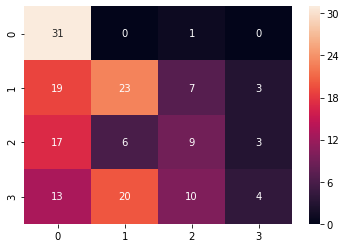

In [17]:
#QDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda=QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
print('Accuracy of QDA classifier on training set: {:.2f}'
     .format(qda.score(X_train, y_train)))
print('Accuracy of QDA classifier on test set: {:.2f}'
     .format(qda.score(X_test, y_test)))

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = qda.predict(X_test)
print(classification_report(y_test, pred))
cm = confusion_matrix(y_test, pred)
print(cm)
# visualize the confusion matrix in a heat map
df_cm = pd.DataFrame(cm)
heatmap= sns.heatmap(df_cm, annot= True,fmt="d")

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

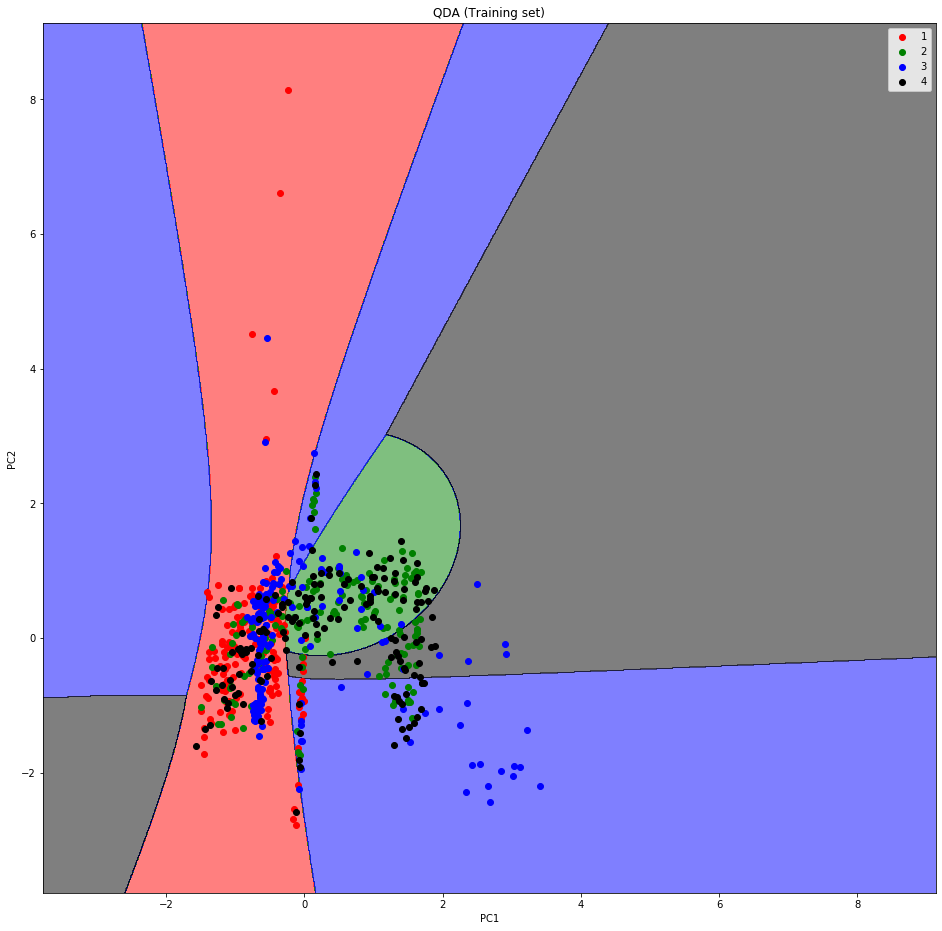

In [18]:
#QDA
from matplotlib.colors import ListedColormap
import numpy as np
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, ].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.figure(figsize=(16,16))
plt.contourf(X1, X2, qda.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.5, cmap = ListedColormap(('red', 'green', 'blue','black')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue','black'))(i), label = j)
plt.title('QDA (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [19]:
#ANN

Accuracy of SVM classifier on training set: 0.48
Accuracy of SVM classifier on test set: 0.46
              precision    recall  f1-score   support

           1       0.39      0.97      0.55        32
           2       0.47      0.44      0.46        52
           3       0.33      0.26      0.29        35
           4       0.40      0.09      0.14        47

    accuracy                           0.40       166
   macro avg       0.40      0.44      0.36       166
weighted avg       0.41      0.40      0.35       166

[[31  0  1  0]
 [19 23  7  3]
 [17  6  9  3]
 [13 20 10  4]]


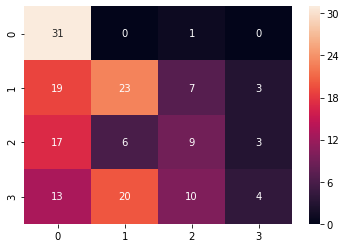

In [20]:
#SVM
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = qda.predict(X_test)
print(classification_report(y_test, pred))
cm = confusion_matrix(y_test, pred)
print(cm)
# visualize the confusion matrix in a heat map
df_cm = pd.DataFrame(cm)
heatmap= sns.heatmap(df_cm, annot= True,fmt="d")

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

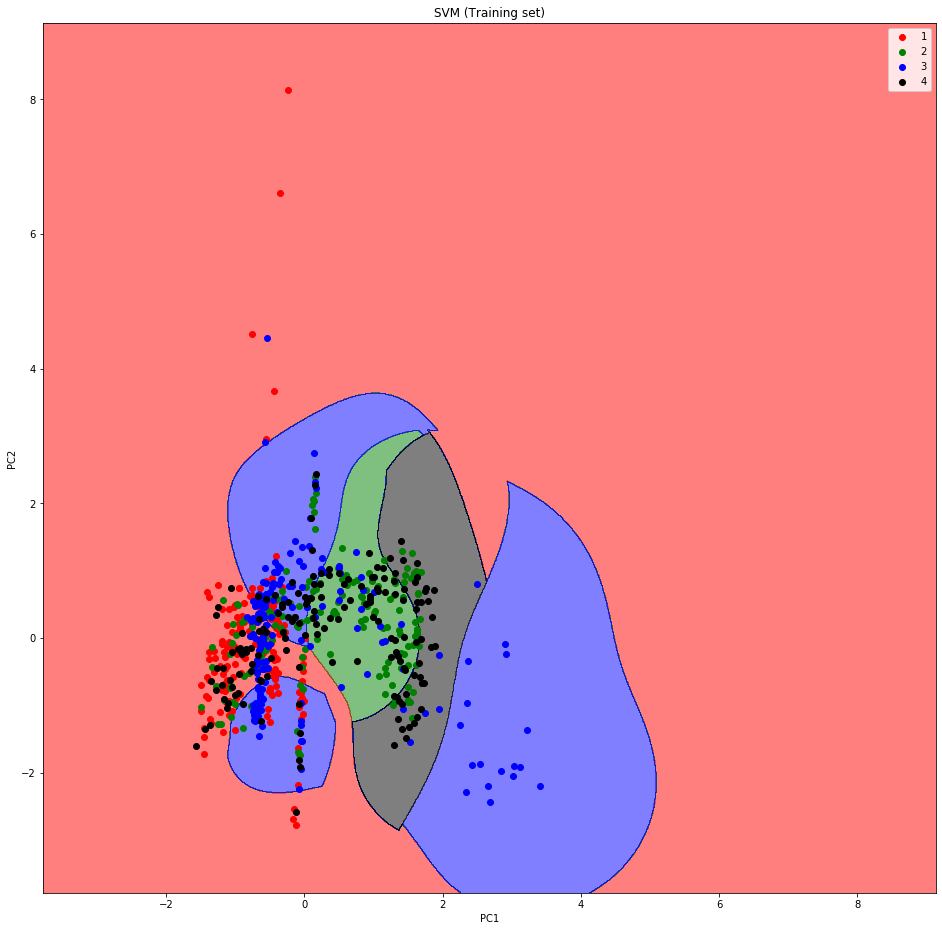

In [21]:
#SVM
from matplotlib.colors import ListedColormap
import numpy as np
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, ].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.figure(figsize=(16,16))
plt.contourf(X1, X2, svm.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.5, cmap = ListedColormap(('red', 'green', 'blue','black')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue','black'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

[Text(189.86265288552883, 212.26285714285714, 'X[0] <= -1.899\nentropy = 0.75\nsamples = 826\nvalue = [194, 209, 214, 209]'),
 Text(79.5330559293857, 201.90857142857143, 'X[0] <= -134.951\nentropy = 0.717\nsamples = 510\nvalue = [193, 88, 149, 80]'),
 Text(32.46478190310323, 191.5542857142857, 'X[0] <= -265.046\nentropy = 0.591\nsamples = 170\nvalue = [97, 35, 4, 34]'),
 Text(26.77799240025333, 181.2, 'X[0] <= -265.99\nentropy = 0.48\nsamples = 5\nvalue = [0, 3, 0, 2]'),
 Text(25.647150094996835, 170.84571428571428, 'X[0] <= -279.639\nentropy = 0.444\nsamples = 3\nvalue = [0, 1, 0, 2]'),
 Text(24.516307789740345, 160.49142857142857, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0]'),
 Text(26.77799240025333, 160.49142857142857, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 0, 2]'),
 Text(27.90883470550982, 170.84571428571428, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2, 0, 0]'),
 Text(38.151571405953135, 181.2, 'X[0] <= -241.48\nentropy = 0.579\nsamples = 165\nvalue = [97, 32, 4, 32]'),


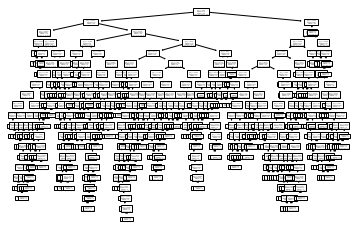

In [22]:
#Tree Based
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,y)
tree.plot_tree(clf.fit(X,y))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.45
              precision    recall  f1-score   support

           1       0.55      0.56      0.55        32
           2       0.49      0.33      0.39        52
           3       0.36      0.54      0.43        35
           4       0.44      0.43      0.43        47

    accuracy                           0.45       166
   macro avg       0.46      0.46      0.45       166
weighted avg       0.46      0.45      0.44       166

[[18  3  7  4]
 [ 6 17 16 13]
 [ 7  1 19  8]
 [ 2 14 11 20]]


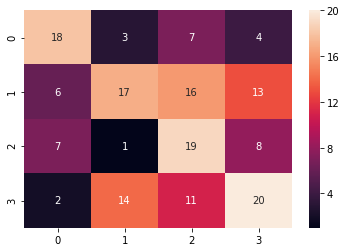

In [23]:
#TB
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = clf.predict(X_test)
print(classification_report(y_test, pred))
cm = confusion_matrix(y_test, pred)
print(cm)
# visualize the confusion matrix in a heat map
df_cm = pd.DataFrame(cm)
heatmap= sns.heatmap(df_cm, annot= True,fmt="d")

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

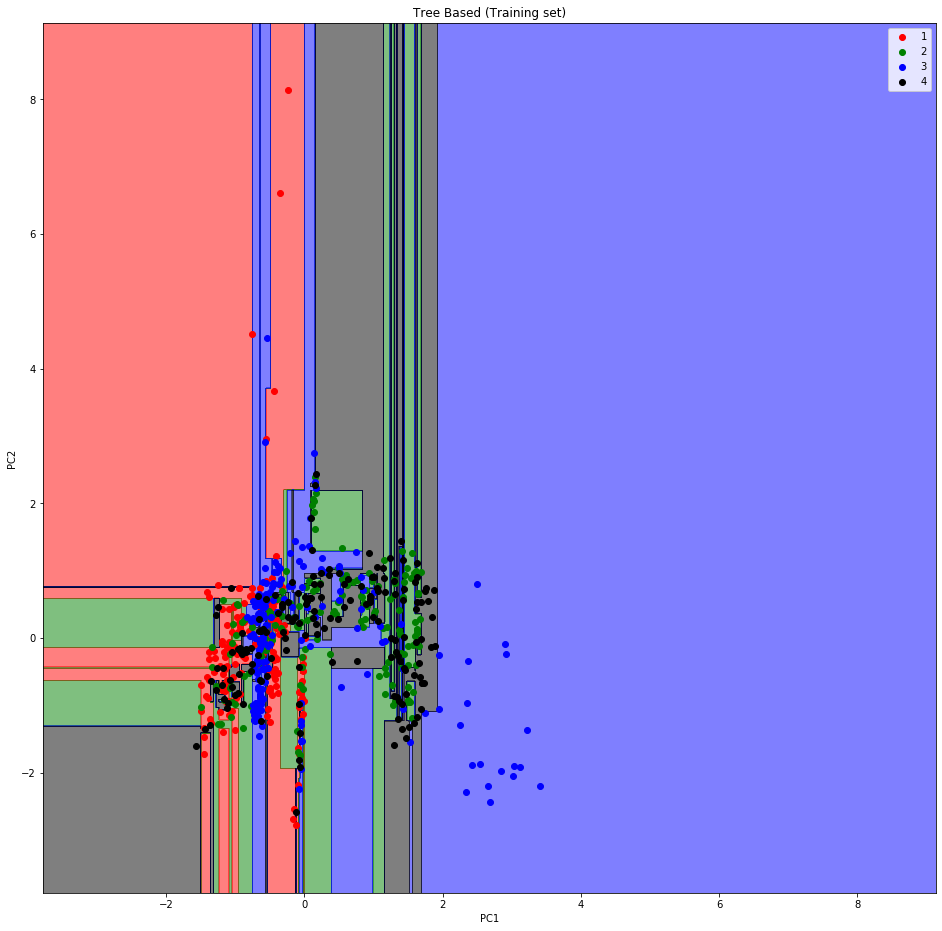

In [24]:
#Tree Based
from matplotlib.colors import ListedColormap
import numpy as np
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, ].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.figure(figsize=(16,16))
plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.5, cmap = ListedColormap(('red', 'green', 'blue','black')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue','black'))(i), label = j)
plt.title('Tree Based (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

Accuracy of GNB classifier on training set: 0.41
Accuracy of GNB classifier on test set: 0.43
              precision    recall  f1-score   support

           1       0.40      0.97      0.56        32
           2       0.47      0.44      0.46        52
           3       0.43      0.26      0.32        35
           4       0.50      0.19      0.28        47

    accuracy                           0.43       166
   macro avg       0.45      0.46      0.40       166
weighted avg       0.46      0.43      0.40       166

[[31  0  1  0]
 [18 23  6  5]
 [16  6  9  4]
 [13 20  5  9]]


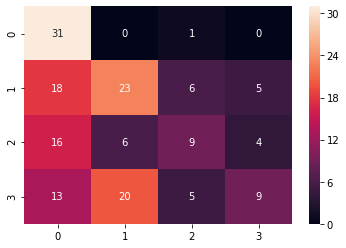

In [25]:
#Bays Classifier
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = gnb.predict(X_test)
print(classification_report(y_test, pred))
cm = confusion_matrix(y_test, pred)
print(cm)
# visualize the confusion matrix in a heat map
df_cm = pd.DataFrame(cm)
heatmap= sns.heatmap(df_cm, annot= True,fmt="d")

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

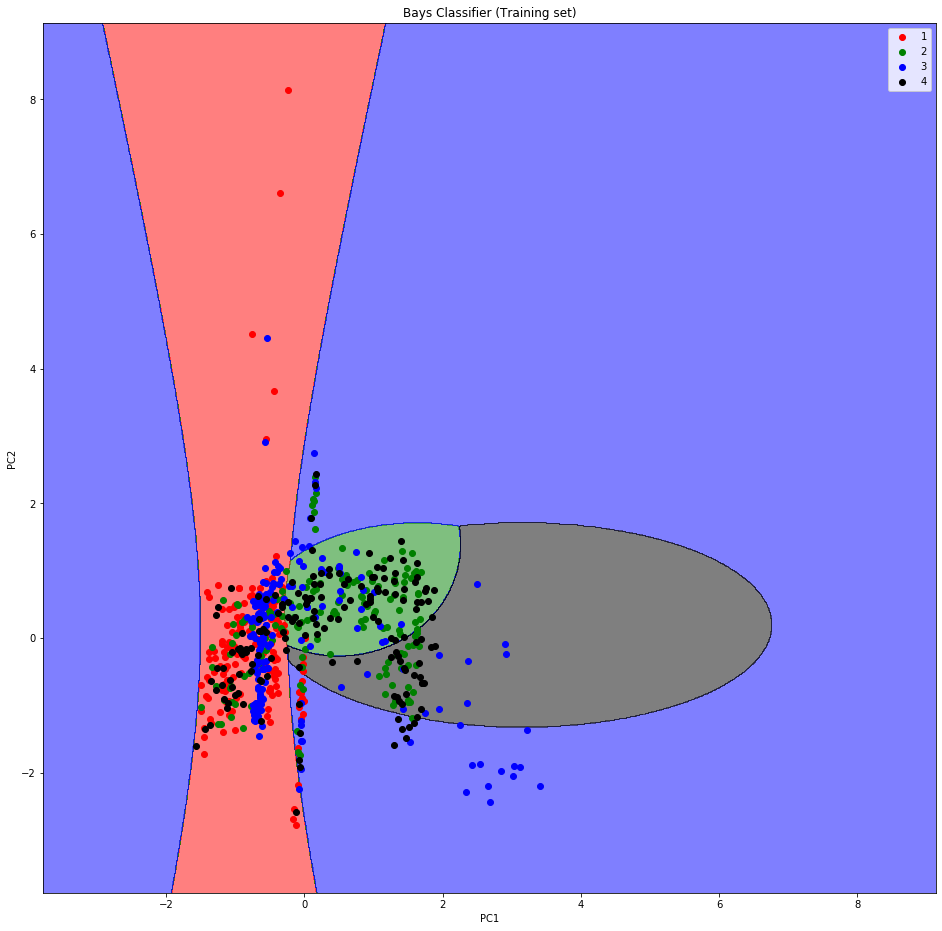

In [26]:
from matplotlib.colors import ListedColormap
import numpy as np
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, ].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.figure(figsize=(16,16))
plt.contourf(X1, X2, gnb.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.5, cmap = ListedColormap(('red', 'green', 'blue','black')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue','black'))(i), label = j)
plt.title('Bays Classifier (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

Accuracy of K-NN classifier on training set: 0.64
Accuracy of K-NN classifier on test set: 0.42
              precision    recall  f1-score   support

           1       0.49      0.75      0.59        32
           2       0.39      0.31      0.34        52
           3       0.40      0.60      0.48        35
           4       0.39      0.19      0.26        47

    accuracy                           0.42       166
   macro avg       0.42      0.46      0.42       166
weighted avg       0.41      0.42      0.40       166

[[24  0  7  1]
 [ 9 16 15 12]
 [ 7  6 21  1]
 [ 9 19 10  9]]


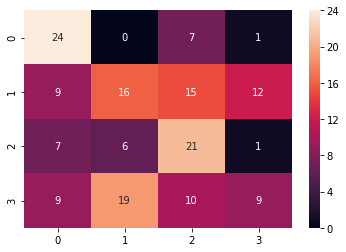

In [27]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = knn.predict(X_test)
print(classification_report(y_test, pred))
cm = confusion_matrix(y_test, pred)
print(cm)
# visualize the confusion matrix in a heat map
df_cm = pd.DataFrame(cm)
heatmap= sns.heatmap(df_cm, annot= True,fmt="d")

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

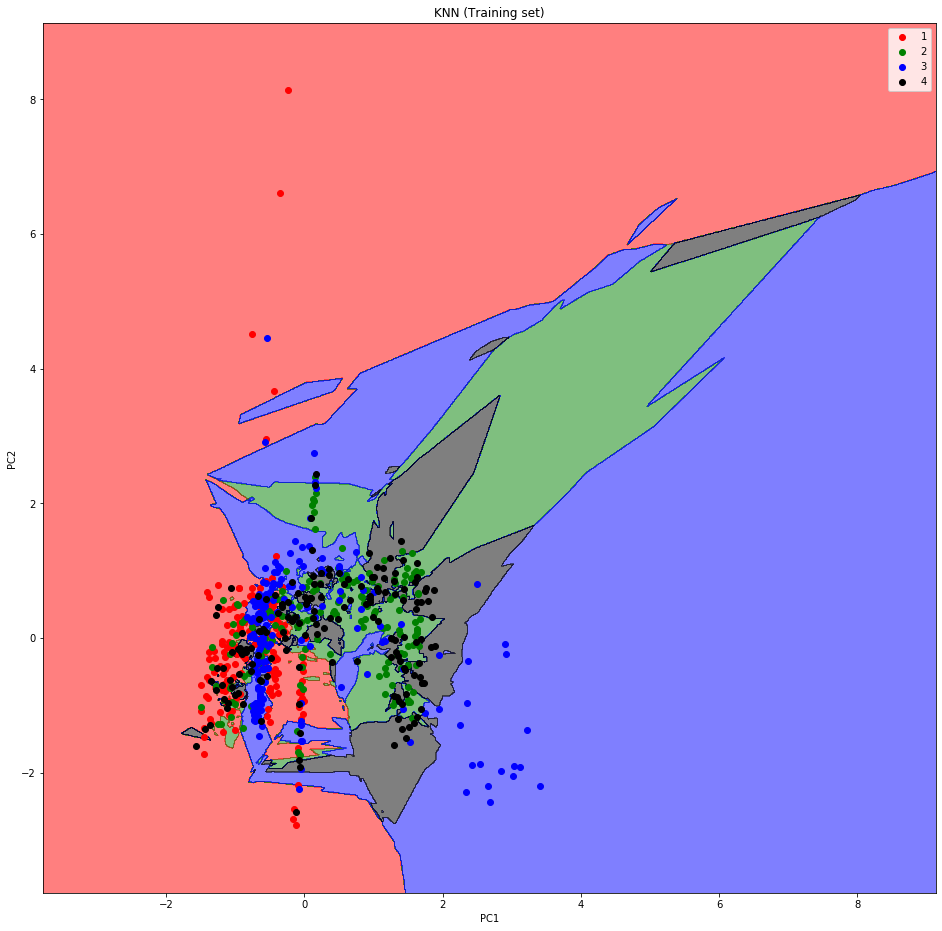

In [28]:
#KNN
from matplotlib.colors import ListedColormap
import numpy as np
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, ].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.figure(figsize=(16,16))
plt.contourf(X1, X2, knn.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.5, cmap = ListedColormap(('red', 'green', 'blue','black')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue','black'))(i), label = j)
plt.title('KNN (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

Accuracy of Bagging classifier on training set: 1.00
Accuracy of Bagging classifier on test set: 0.46
              precision    recall  f1-score   support

           1       0.49      0.69      0.57        32
           2       0.52      0.27      0.35        52
           3       0.41      0.57      0.48        35
           4       0.44      0.43      0.43        47

    accuracy                           0.46       166
   macro avg       0.47      0.49      0.46       166
weighted avg       0.47      0.46      0.44       166

[[22  1  8  1]
 [ 9 14 11 18]
 [ 7  2 20  6]
 [ 7 10 10 20]]


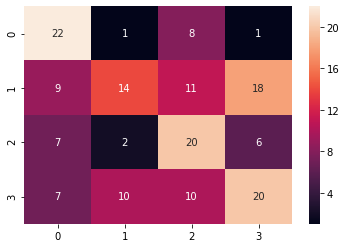

In [29]:
#################################### Bagging ######################################
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
import csv

seed = 7
cart = DecisionTreeClassifier()
num_trees = 100
bg = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)

bg.fit(X_train, y_train)
print('Accuracy of Bagging classifier on training set: {:.2f}'
     .format(bg.score(X_train, y_train)))
print('Accuracy of Bagging classifier on test set: {:.2f}'
     .format(bg.score(X_test, y_test)))

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = bg.predict(X_test)
print(classification_report(y_test, pred))

cm = confusion_matrix(y_test, pred)
print(cm)
# visualize the confusion matrix in a heat map
df_cm = pd.DataFrame(cm)
heatmap= sns.heatmap(df_cm, annot= True,fmt="d")

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

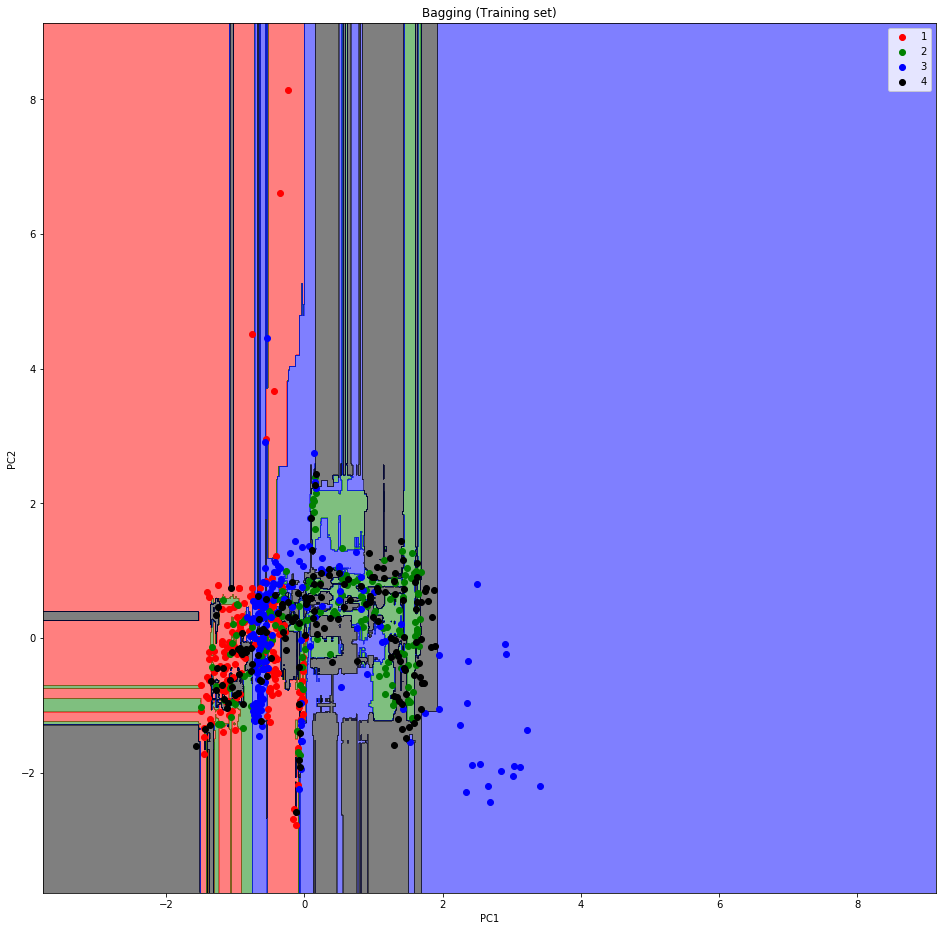

In [30]:
#Bagging
from matplotlib.colors import ListedColormap
import numpy as np
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, ].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.figure(figsize=(16,16))
plt.contourf(X1, X2, bg.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.5, cmap = ListedColormap(('red', 'green', 'blue','black')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue','black'))(i), label = j)
plt.title('Bagging (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

Accuracy of Random Forest classifier on training set: 1.00
Accuracy of Random Forest classifier on test set: 0.48
              precision    recall  f1-score   support

           1       0.53      0.66      0.58        32
           2       0.56      0.38      0.45        52
           3       0.43      0.57      0.49        35
           4       0.44      0.40      0.42        47

    accuracy                           0.48       166
   macro avg       0.49      0.50      0.49       166
weighted avg       0.49      0.48      0.48       166

[[21  1  8  2]
 [ 7 20  9 16]
 [ 7  2 20  6]
 [ 5 13 10 19]]


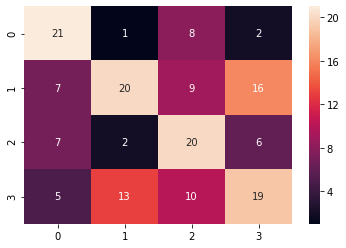

In [31]:
###################################### Random Forest code ##############################
import pandas
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
data = pd.read_csv("vehicle_4_mean.csv")

Y = data.Type
X = data.drop(['Vehicle','Type'], axis=1)

seed = 7
num_trees = 100
max_features = 2

rf = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)

rf.fit(X_train, y_train)
print('Accuracy of Random Forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))
print('Accuracy of Random Forest classifier on test set: {:.2f}'
     .format(rf.score(X_test, y_test)))

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = rf.predict(X_test)
print(classification_report(y_test, pred))
cm = confusion_matrix(y_test, pred)
print(cm)
# visualize the confusion matrix in a heat map
df_cm = pd.DataFrame(cm)
heatmap= sns.heatmap(df_cm, annot= True,fmt="d")

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

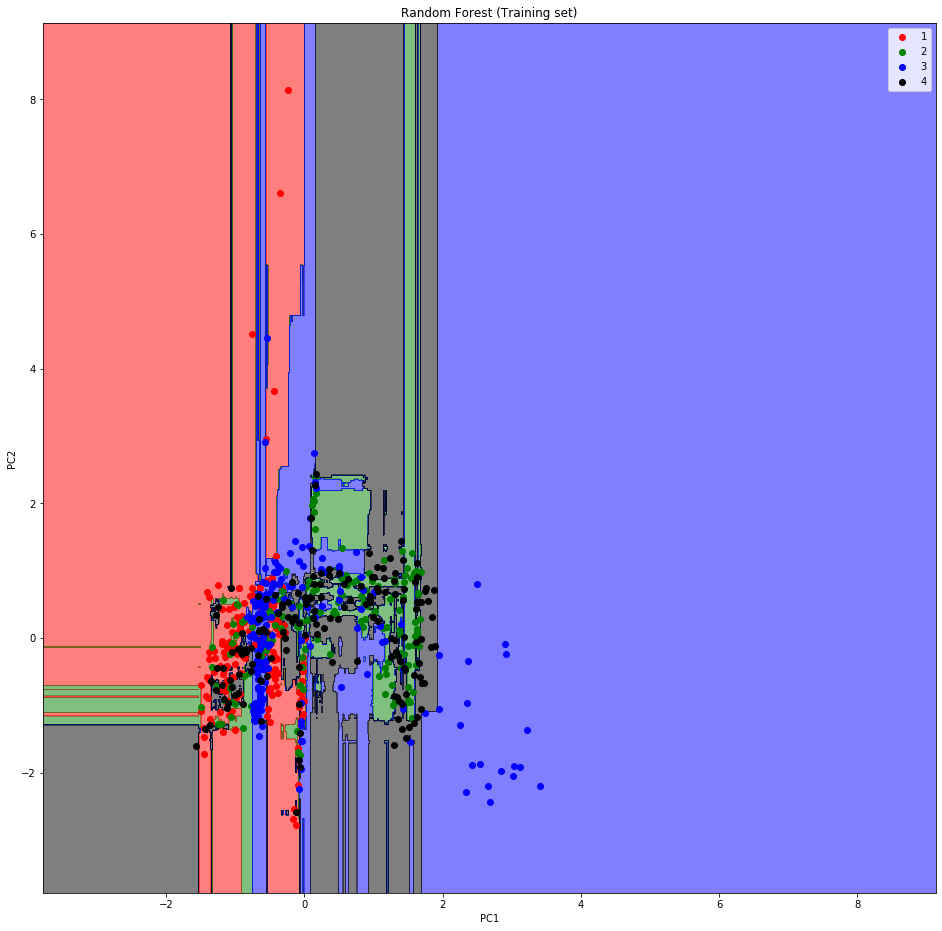

In [32]:
#Random Forest
from matplotlib.colors import ListedColormap
import numpy as np
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, ].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.figure(figsize=(16,16))
plt.contourf(X1, X2, rf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.5, cmap = ListedColormap(('red', 'green', 'blue','black')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue','black'))(i), label = j)
plt.title('Random Forest (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

Accuracy of Adaboost classifier on training set: 0.53
Accuracy of Adaboost classifier on test set: 0.40
              precision    recall  f1-score   support

           1       0.44      0.59      0.51        32
           2       0.43      0.48      0.45        52
           3       0.32      0.40      0.35        35
           4       0.38      0.17      0.24        47

    accuracy                           0.40       166
   macro avg       0.39      0.41      0.39       166
weighted avg       0.40      0.40      0.38       166

[[19  3  9  1]
 [10 25 12  5]
 [ 8  6 14  7]
 [ 6 24  9  8]]


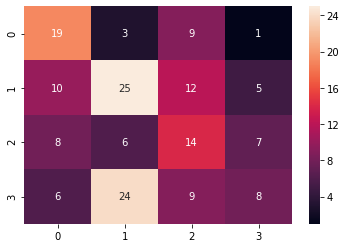

In [33]:
#Adaboost
from sklearn.ensemble import AdaBoostClassifier

seed = 7
num_trees = 70
ab = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
ab.fit(X_train, y_train)
print('Accuracy of Adaboost classifier on training set: {:.2f}'
     .format(ab.score(X_train, y_train)))
print('Accuracy of Adaboost classifier on test set: {:.2f}'
     .format(ab.score(X_test, y_test)))

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = ab.predict(X_test)
print(classification_report(y_test, pred))
cm = confusion_matrix(y_test, pred)
print(cm)
# visualize the confusion matrix in a heat map
df_cm = pd.DataFrame(cm)
heatmap= sns.heatmap(df_cm, annot= True,fmt="d")

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

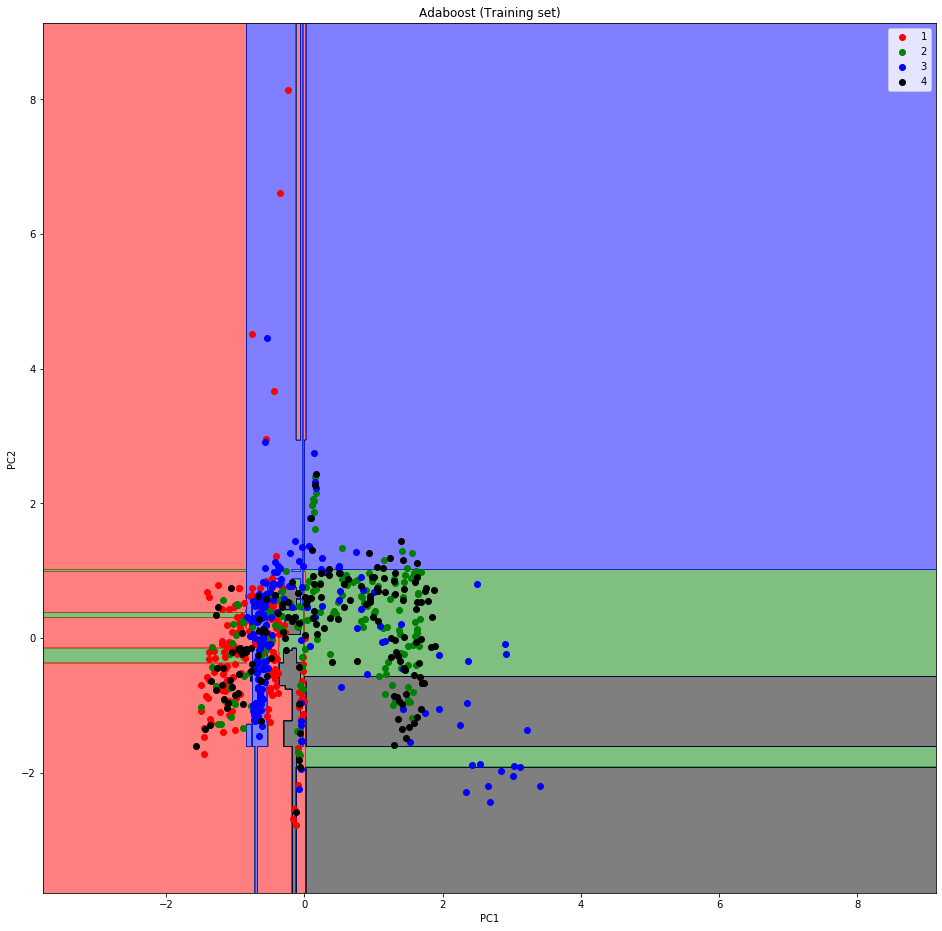

In [34]:
#Adaboost
from matplotlib.colors import ListedColormap
import numpy as np
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, ].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.figure(figsize=(16,16))
plt.contourf(X1, X2, ab.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.5, cmap = ListedColormap(('red', 'green', 'blue','black')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue','black'))(i), label = j)
plt.title('Adaboost (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()